In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

df = pd.read_csv('data/kc_house_data.csv')

df.info()

df.dropna(inplace= True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [2]:
df.drop(columns= ['sqft_basement'], axis = 1, inplace= True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  float64
 9   view           15762 non-null  float64
 10  condition      15762 non-null  int64  
 11  grade          15762 non-null  int64  
 12  sqft_above     15762 non-null  int64  
 13  yr_built       15762 non-null  int64  
 14  yr_renovated   15762 non-null  float64
 15  zipcode        15762 non-null  int64  
 16  lat            15762 non-null  float64
 17  long           15762 non-null  float64
 18  sqft_l

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=objec

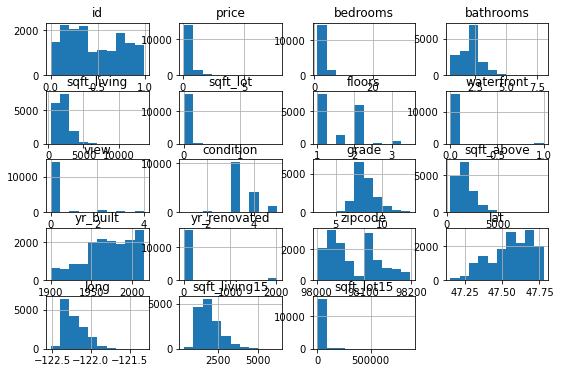

In [4]:
df.hist(figsize= (9,6))

<AxesSubplot:>

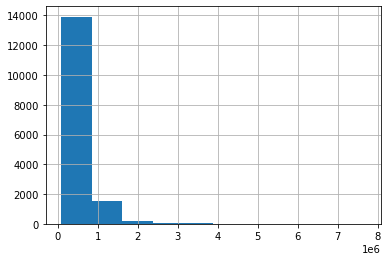

In [5]:
df.price.hist()

<AxesSubplot:>

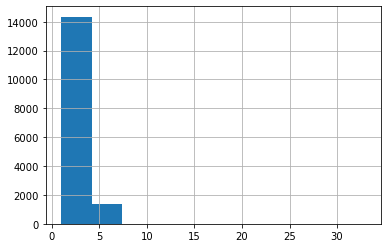

In [6]:
df.bedrooms.hist()

## Model 1 - Removing outliers from bedrooms, price

In [7]:
df[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,1947,0.0,98103,47.6878,-122.331,1330,4700


In [8]:
df.drop(labels = 15856, axis = 0, inplace= True)


<AxesSubplot:>

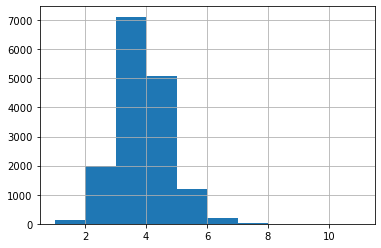

In [9]:
df.bedrooms.hist()

In [10]:
df = df[df['bedrooms'] < 9]

<AxesSubplot:>

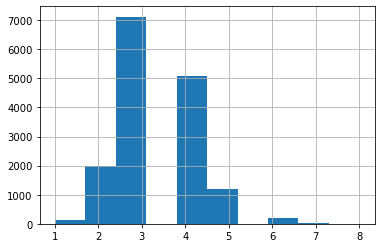

In [11]:
df.bedrooms.hist()

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=objec

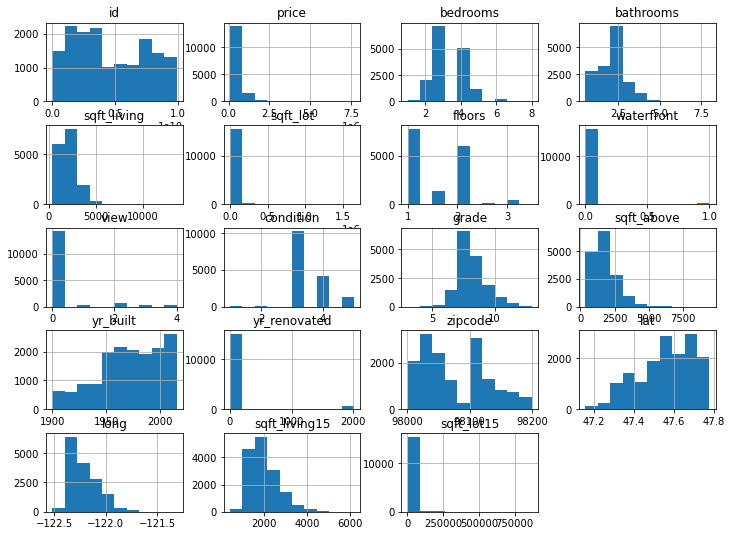

In [12]:
df.hist(figsize= (12,9))

<AxesSubplot:>

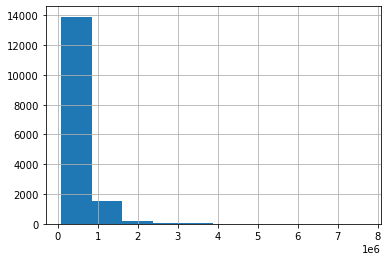

In [13]:
df.price.hist()

In [14]:
df = df[df['price'] < 4000000]

In [15]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.574100e+04,1.574100e+04,15741.000000,15741.000000,15741.000000,1.574100e+04,15741.000000,15741.000000,15741.000000,15741.000000,15741.000000,15741.000000,15741.000000,15741.000000,15741.000000,15741.000000,15741.000000,15741.000000,15741.000000
mean,4.592255e+09,5.380393e+05,3.372149,2.117353,2079.440569,1.527866e+04,1.494568,0.007369,0.228575,3.411092,7.660949,1789.122483,1971.124007,81.914554,98077.571882,47.559078,-122.213455,1989.049171,12900.388031
std,2.875307e+09,3.501585e+05,0.891152,0.758661,902.714662,4.184802e+04,0.539264,0.085530,0.758249,0.652082,1.167146,818.609048,29.318019,395.994508,53.417842,0.138683,0.140770,682.717175,27993.425293
min,1.000102e+06,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.125400e+09,3.200000e+05,3.000000,1.750000,1430.000000,5.048000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.000000,47.469000,-122.328000,1490.000000,5100.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.601000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.570800,-122.229000,1840.000000,7620.000000
75%,7.334501e+09,6.412500e+05,4.000000,2.500000,2550.000000,1.070800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98117.000000,47.677500,-122.124000,2370.000000,10100.000000
max,9.895000e+09,3.850000e+06,8.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<AxesSubplot:>

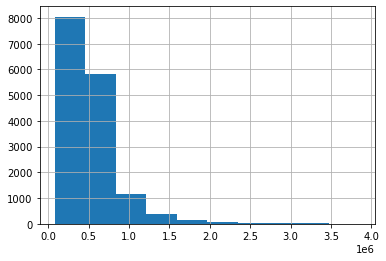

In [16]:
df.price.hist()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15741 entries, 1 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15741 non-null  int64  
 1   date           15741 non-null  object 
 2   price          15741 non-null  float64
 3   bedrooms       15741 non-null  int64  
 4   bathrooms      15741 non-null  float64
 5   sqft_living    15741 non-null  int64  
 6   sqft_lot       15741 non-null  int64  
 7   floors         15741 non-null  float64
 8   waterfront     15741 non-null  float64
 9   view           15741 non-null  float64
 10  condition      15741 non-null  int64  
 11  grade          15741 non-null  int64  
 12  sqft_above     15741 non-null  int64  
 13  yr_built       15741 non-null  int64  
 14  yr_renovated   15741 non-null  float64
 15  zipcode        15741 non-null  int64  
 16  lat            15741 non-null  float64
 17  long           15741 non-null  float64
 18  sqft_l

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=objec

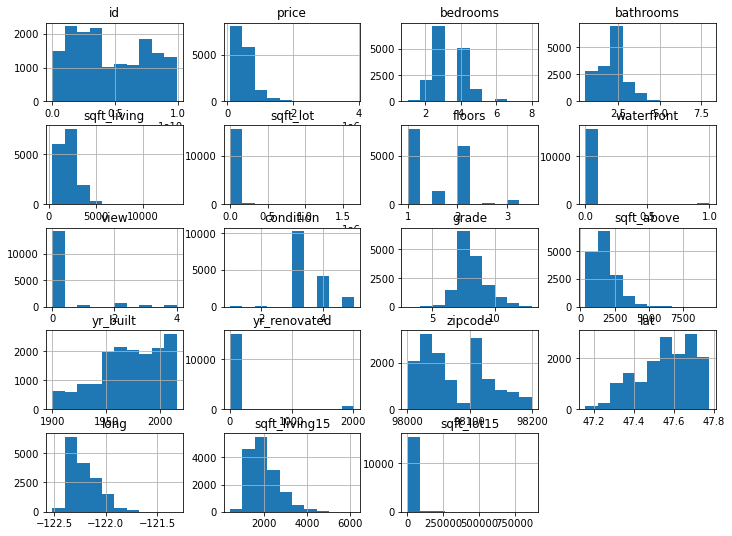

In [18]:
df.hist(figsize=(12,9))

In [19]:
import statsmodels.formula as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
x_cols = df.drop(['price', 'date', 'id', 'zipcode', 'sqft_above', 'sqft_lot15'], axis = 1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

In [20]:
model_1 = ols(formula= f, data = df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     2673.
Date:                Thu, 07 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:32:32   Log-Likelihood:            -2.1370e+05
No. Observations:               15741   AIC:                         4.274e+05
Df Residuals:                   15726   BIC:                         4.276e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -3.43e+07   1.71e+06    -20.051      0.000   -3.77e+07   -3.09e+07
bedrooms      -3.129e+04   2233.396    -14.010      0.000   -3.57e+04   -2.69e+04
bathrooms      4.068e+04   3599.473     11.301      0.000    3.36e+04    4.77e+04
sqft_living     145.2842      3.787     38.368      0.000     137.862     152.706
sqft_lot         -0.0036      0.038     -0.096      0.924      -0.078       0.071
floors         1.859e+04   3570.243      5.207      0.000    1.16e+04    2.56e+04
waterfront     5.572e+05   1.95e+04     28.573      0.000    5.19e+05    5.95e+05
view           4.658e+04   2355.099     19.780      0.000     4.2e+04    5.12e+04
condition      3.199e+04   2586.133     12.370      0.000    2.69e+04    3.71e+04
grade          1.017e+05   2386.013     42.644      0.000    9.71e+04    1.06e+05
yr_built      -2476.9451     79.988    -30.966      0.000   -2633.732   -2320.159
yr_renovated     19.2328      4.097      4.694      0.000      11.201      27.264
lat            5.524e+05   1.15e+04     47.962      0.000     5.3e+05    5.75e+05
long          -9.943e+04   1.29e+04     -7.692      0.000   -1.25e+05   -7.41e+04
sqft_living15    40.6855      3.805     10.692      0.000      33.227      48.144
==============================================================================
Omnibus:                     9302.980   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           203926.817
Skew:                           2.423   Prob(JB):                         0.00
Kurtosis:                      19.954   Cond. No.                     5.02e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.02e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train MSE: 35652186105.754654
Test MSE: 38680274177.19023
RMSE Train: 188817.8649009533
RMSE Test: 196673.0133424264


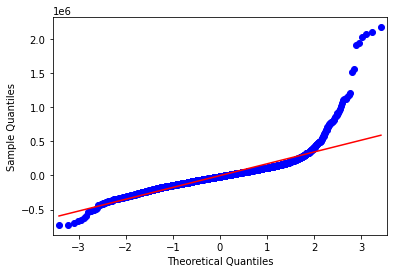

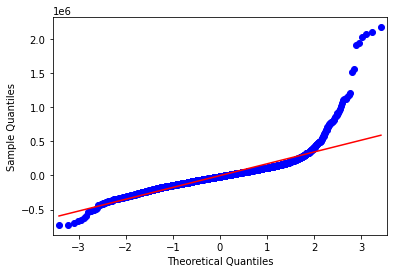

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels
from sklearn.metrics import r2_score

data = df.copy()

y = data['price']
X = data.drop(['price', 'date', 'id', 'zipcode', 'sqft_above'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

len(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

r2_score(y_test, y_hat_test)

residuals = (y_test - y_hat_test)

statsmodels.graphics.gofplots.qqplot(residuals, line = "r")

## Model 2 with zipcode dummies

In [22]:
zip_dummies = pd.get_dummies(df['zipcode'], prefix = 'zipcode')

In [23]:
df_with_zip_dummies = pd.concat([df, zip_dummies], axis = 1)

In [24]:
df_with_zip_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15741 entries, 1 to 21596
Data columns (total 90 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15741 non-null  int64  
 1   date           15741 non-null  object 
 2   price          15741 non-null  float64
 3   bedrooms       15741 non-null  int64  
 4   bathrooms      15741 non-null  float64
 5   sqft_living    15741 non-null  int64  
 6   sqft_lot       15741 non-null  int64  
 7   floors         15741 non-null  float64
 8   waterfront     15741 non-null  float64
 9   view           15741 non-null  float64
 10  condition      15741 non-null  int64  
 11  grade          15741 non-null  int64  
 12  sqft_above     15741 non-null  int64  
 13  yr_built       15741 non-null  int64  
 14  yr_renovated   15741 non-null  float64
 15  zipcode        15741 non-null  int64  
 16  lat            15741 non-null  float64
 17  long           15741 non-null  float64
 18  sqft_l

In [25]:
outcome = 'price'
x_cols = df_with_zip_dummies.drop(['price', 'date', 'id', 'zipcode', 'sqft_above', 'sqft_lot15', 'sqft_lot'], axis = 1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

In [26]:
model_2 = ols(formula= f, data = df_with_zip_dummies).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     841.6
Date:                Thu, 07 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:32:33   Log-Likelihood:            -2.1000e+05
No. Observations:               15741   AIC:                         4.202e+05
Df Residuals:                   15658   BIC:                         4.208e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.943e+07   6.69e+06     -2.903      0.004   -3.25e+07   -6.31e+06
bedrooms      -2.524e+04   1793.999    -14.070      0.000   -2.88e+04   -2.17e+04
bathrooms      1.765e+04   2897.828      6.091      0.000     1.2e+04    2.33e+04
sqft_living     159.6557      3.035     52.608      0.000     153.707     165.604
floors        -6728.4399   3048.547     -2.207      0.027   -1.27e+04    -752.936
waterfront     6.191e+05   1.58e+04     39.204      0.000    5.88e+05     6.5e+05
view           4.982e+04   1928.086     25.840      0.000     4.6e+04    5.36e+04
condition      2.337e+04   2113.129     11.059      0.000    1.92e+04    2.75e+04
grade          6.803e+04   1983.793     34.292      0.000    6.41e+04    7.19e+04
yr_built       -918.2849     71.018    -12.930      0.000   -1057.488    -779.082
yr_renovated     13.0679      3.279      3.985      0.000       6.640      19.496
lat            1.939e+05   6.96e+04      2.787      0.005    5.75e+04     3.3e+05
long          -9.735e+04   5.06e+04     -1.925      0.054   -1.96e+05    1786.597
sqft_living15    27.5701      3.191      8.639      0.000      21.315      33.825
zipcode_98001 -4.222e+05   9.32e+04     -4.532      0.000   -6.05e+05    -2.4e+05
zipcode_98002 -3.851e+05   9.08e+04     -4.241      0.000   -5.63e+05   -2.07e+05
zipcode_98003 -4.517e+05   9.52e+04     -4.743      0.000   -6.38e+05   -2.65e+05
zipcode_98004  2.617e+05   9.77e+04      2.677      0.007    7.01e+04    4.53e+05
zipcode_98005 -1.829e+05   9.64e+04     -1.897      0.058   -3.72e+05    6069.652
zipcode_98006  -2.13e+05   9.33e+04     -2.283      0.022   -3.96e+05   -3.01e+04
zipcode_98007 -2.362e+05   9.55e+04     -2.473      0.013   -4.23e+05    -4.9e+04
zipcode_98008 -2.244e+05   9.39e+04     -2.389      0.017   -4.08e+05   -4.03e+04
zipcode_98010 -3.256e+05   8.24e+04     -3.951      0.000   -4.87e+05   -1.64e+05
zipcode_98011 -3.914e+05   1.03e+05     -3.812      0.000   -5.93e+05    -1.9e+05
zipcode_98014 -3.295e+05   8.62e+04     -3.822      0.000   -4.99e+05   -1.61e+05
zipcode_98019 -3.893e+05   9.26e+04     -4.206      0.000   -5.71e+05   -2.08e+05
zipcode_98022 -3.724e+05   7.87e+04     -4.729      0.000   -5.27e+05   -2.18e+05
zipcode_98023 -4.692e+05   9.75e+04     -4.811      0.000    -6.6e+05   -2.78e+05
zipcode_98024 -2.626e+05   8.49e+04     -3.094      0.002   -4.29e+05   -9.62e+04
zipcode_98027 -2.882e+05   8.77e+04     -3.287      0.001    -4.6e+05   -1.16e+05
zipcode_98028 -3.968e+05   1.04e+05     -3.808      0.000   -6.01e+05   -1.93e+05
zipcode_98029   -2.5e+05   8.74e+04     -2.859      0.004   -4.21e+05   -7.86e+04
zipcode_98030 -4.281e+05   9.07e+04     -4.719      0.000   -6.06e+05    -2.5e+05
zipcode_98031 -4.258e+05   9.14e+04     -4.660      0.000   -6.05e+05   -2.47e+05
zipcode_98032   -4.4e+05   9.54e+04     -4.610   

Train MSE: 22196793427.689747
Test MSE: 24364151772.97297
RMSE Train: 148985.88331680873
RMSE Test: 156090.20396223772


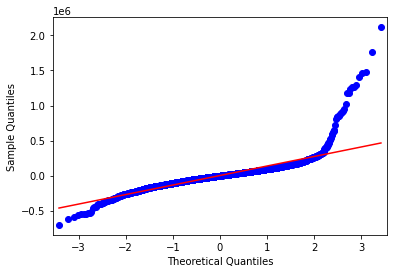

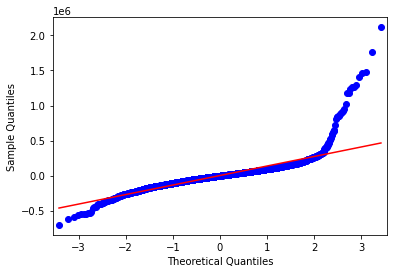

In [27]:
data = df_with_zip_dummies.copy()

y = data['price']
X = data.drop(['price', 'date', 'id', 'zipcode', 'sqft_above'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

len(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

r2_score(y_test, y_hat_test)

residuals = (y_test - y_hat_test)

statsmodels.graphics.gofplots.qqplot(residuals, line = "r")

## Model 3 - use the z score to drop outliers

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15741 entries, 1 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15741 non-null  int64  
 1   date           15741 non-null  object 
 2   price          15741 non-null  float64
 3   bedrooms       15741 non-null  int64  
 4   bathrooms      15741 non-null  float64
 5   sqft_living    15741 non-null  int64  
 6   sqft_lot       15741 non-null  int64  
 7   floors         15741 non-null  float64
 8   waterfront     15741 non-null  float64
 9   view           15741 non-null  float64
 10  condition      15741 non-null  int64  
 11  grade          15741 non-null  int64  
 12  sqft_above     15741 non-null  int64  
 13  yr_built       15741 non-null  int64  
 14  yr_renovated   15741 non-null  float64
 15  zipcode        15741 non-null  int64  
 16  lat            15741 non-null  float64
 17  long           15741 non-null  float64
 18  sqft_l

In [29]:
df.drop(columns=['date'], inplace= True)

In [30]:
from scipy import stats
df_z_score = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [32]:
df_z_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13700 entries, 3 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             13700 non-null  int64  
 1   price          13700 non-null  float64
 2   bedrooms       13700 non-null  int64  
 3   bathrooms      13700 non-null  float64
 4   sqft_living    13700 non-null  int64  
 5   sqft_lot       13700 non-null  int64  
 6   floors         13700 non-null  float64
 7   waterfront     13700 non-null  float64
 8   view           13700 non-null  float64
 9   condition      13700 non-null  int64  
 10  grade          13700 non-null  int64  
 11  sqft_above     13700 non-null  int64  
 12  yr_built       13700 non-null  int64  
 13  yr_renovated   13700 non-null  float64
 14  zipcode        13700 non-null  int64  
 15  lat            13700 non-null  float64
 16  long           13700 non-null  float64
 17  sqft_living15  13700 non-null  int64  
 18  sqft_l

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=objec

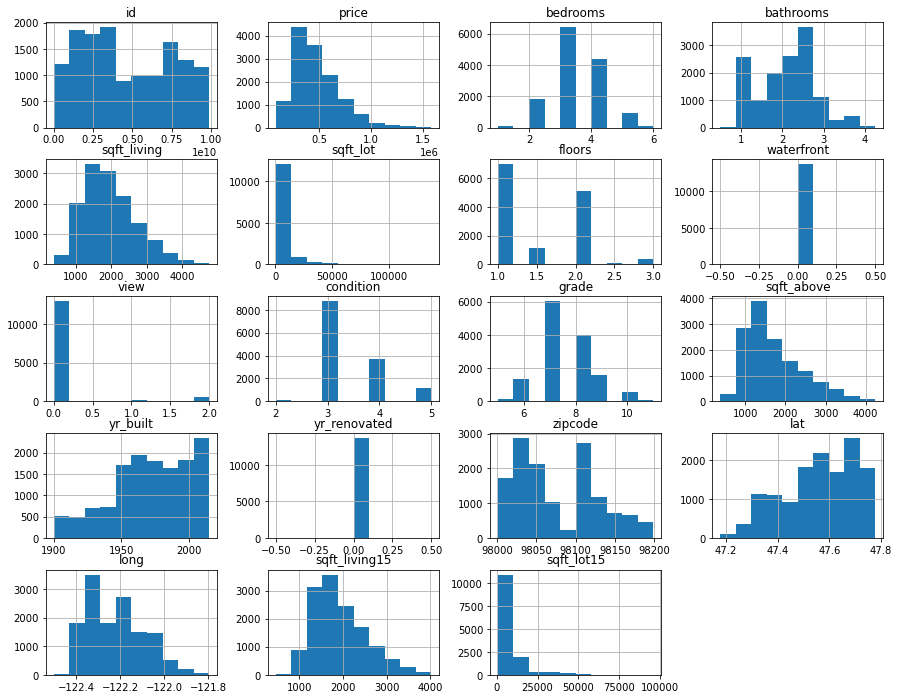

In [34]:
df_z_score.hist(figsize=(15,12))

In [36]:
outcome = 'price'
x_cols = df_z_score.drop(['price' , 'id', 'zipcode', 'sqft_above', 'sqft_lot15', 'sqft_lot'], axis = 1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

In [38]:
model_3 = ols(formula= f, data = df_z_score).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     2647.
Date:                Thu, 07 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:35:22   Log-Likelihood:            -1.8078e+05
No. Observations:               13700   AIC:                         3.616e+05
Df Residuals:                   13688   BIC:                         3.617e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.812e+07   1.36e+06    -20.616      0.000   -3.08e+07   -2.54e+07
bedrooms      -1.287e+04   1716.550     -7.495      0.000   -1.62e+04   -9501.034
bathrooms      2.853e+04   2782.289     10.254      0.000    2.31e+04     3.4e+04
sqft_living      91.1549      3.148     28.956      0.000      84.984      97.325
floors         3.372e+04   2650.614     12.722      0.000    2.85e+04    3.89e+04
waterfront     1.625e-06   7.88e-08     20.620      0.000    1.47e-06    1.78e-06
view            3.97e+04   2859.994     13.881      0.000    3.41e+04    4.53e+04
condition      3.072e+04   1913.626     16.051      0.000     2.7e+04    3.45e+04
grade          8.412e+04   1834.858     45.844      0.000    8.05e+04    8.77e+04
yr_built      -2048.8429     60.667    -33.772      0.000   -2167.758   -1929.928
yr_renovated  -8.928e-08   4.33e-09    -20.596      0.000   -9.78e-08   -8.08e-08
lat            5.513e+05   8315.905     66.294      0.000    5.35e+05    5.68e+05
long          -4.375e+04   1.04e+04     -4.206      0.000   -6.41e+04   -2.34e+04
sqft_living15    47.2849      3.141     15.055      0.000      41.129      53.441
==============================================================================
Omnibus:                     3560.281   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15104.138
Skew:                           1.221   Prob(JB):                         0.00
Kurtosis:                       7.527   Cond. No.                     1.27e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Train MSE: 16753970167.348076
Test MSE: 17326902117.561115
RMSE Train: 129437.12824127424
RMSE Test: 131631.6911596942


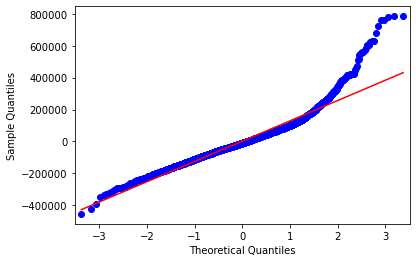

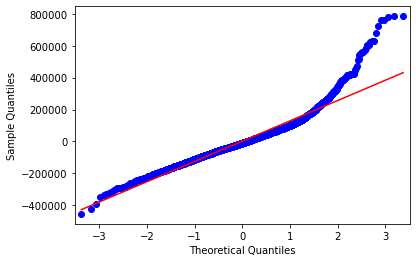

In [40]:
data = df_z_score.copy()

y = data['price']
X = data.drop(['price', 'id', 'zipcode', 'sqft_above'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

len(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

r2_score(y_test, y_hat_test)

residuals = (y_test - y_hat_test)

statsmodels.graphics.gofplots.qqplot(residuals, line = "r")

In [41]:
df.price.mean()

538039.3447049108

## Model 4 - with zip dummies, outliers dropped using z score

In [42]:
zip_dummies_2 = pd.get_dummies(df_z_score['zipcode'], prefix = 'zipcode')

In [43]:
df_z_score_zip_dummies = pd.concat([df_z_score, zip_dummies_2], axis = 1)

In [44]:
df_z_score_zip_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13700 entries, 3 to 21596
Data columns (total 89 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             13700 non-null  int64  
 1   price          13700 non-null  float64
 2   bedrooms       13700 non-null  int64  
 3   bathrooms      13700 non-null  float64
 4   sqft_living    13700 non-null  int64  
 5   sqft_lot       13700 non-null  int64  
 6   floors         13700 non-null  float64
 7   waterfront     13700 non-null  float64
 8   view           13700 non-null  float64
 9   condition      13700 non-null  int64  
 10  grade          13700 non-null  int64  
 11  sqft_above     13700 non-null  int64  
 12  yr_built       13700 non-null  int64  
 13  yr_renovated   13700 non-null  float64
 14  zipcode        13700 non-null  int64  
 15  lat            13700 non-null  float64
 16  long           13700 non-null  float64
 17  sqft_living15  13700 non-null  int64  
 18  sqft_l

In [45]:
outcome = 'price'
x_cols = df_z_score_zip_dummies.drop(['price' , 'id', 'zipcode', 'sqft_above', 'sqft_lot15', 'sqft_lot'], axis = 1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

In [46]:
model_4 = ols(formula= f, data = df_z_score_zip_dummies).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     823.8
Date:                Thu, 07 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:40:55   Log-Likelihood:            -1.7650e+05
No. Observations:               13700   AIC:                         3.532e+05
Df Residuals:                   13619   BIC:                         3.538e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.19e+07    5.7e+06     -2.086      0.037   -2.31e+07   -7.19e+05
bedrooms      -6701.2504   1282.623     -5.225      0.000   -9215.369   -4187.132
bathrooms      9453.3034   2078.948      4.547      0.000    5378.278    1.35e+04
sqft_living     112.6118      2.354     47.836      0.000     107.997     117.226
floors         2337.4581   2109.804      1.108      0.268   -1798.050    6472.966
waterfront       -0.0005      0.000     -2.086      0.037      -0.001   -3.25e-05
view           3.481e+04   2144.395     16.235      0.000    3.06e+04     3.9e+04
condition      2.336e+04   1452.188     16.086      0.000    2.05e+04    2.62e+04
grade          5.288e+04   1421.707     37.195      0.000    5.01e+04    5.57e+04
yr_built       -611.2530     49.739    -12.289      0.000    -708.749    -513.757
yr_renovated      0.0005      0.000      2.086      0.037    3.18e-05       0.001
lat            1.443e+05   4.91e+04      2.936      0.003    4.79e+04    2.41e+05
long          -5.018e+04   4.61e+04     -1.089      0.276    -1.4e+05    4.01e+04
sqft_living15    35.2918      2.425     14.551      0.000      30.538      40.046
zipcode_98001 -3.192e+05    8.2e+04     -3.894      0.000    -4.8e+05   -1.59e+05
zipcode_98002 -2.981e+05   7.96e+04     -3.747      0.000   -4.54e+05   -1.42e+05
zipcode_98003 -3.313e+05   8.37e+04     -3.957      0.000   -4.95e+05   -1.67e+05
zipcode_98004   2.26e+05   8.23e+04      2.747      0.006    6.48e+04    3.87e+05
zipcode_98005 -3.976e+04   8.09e+04     -0.491      0.623   -1.98e+05    1.19e+05
zipcode_98006 -9.963e+04   7.92e+04     -1.258      0.208   -2.55e+05    5.56e+04
zipcode_98007 -1.055e+05   7.99e+04     -1.321      0.187   -2.62e+05    5.11e+04
zipcode_98008 -1.274e+05   7.86e+04     -1.620      0.105   -2.82e+05    2.68e+04
zipcode_98010 -2.209e+05   7.16e+04     -3.083      0.002   -3.61e+05   -8.05e+04
zipcode_98011 -2.451e+05   8.46e+04     -2.896      0.004   -4.11e+05   -7.92e+04
zipcode_98014 -2.177e+05   7.23e+04     -3.012      0.003   -3.59e+05    -7.6e+04
zipcode_98019 -2.785e+05   7.51e+04     -3.706      0.000   -4.26e+05   -1.31e+05
zipcode_98022 -2.872e+05   6.96e+04     -4.129      0.000   -4.24e+05   -1.51e+05
zipcode_98023 -3.516e+05   8.61e+04     -4.086      0.000    -5.2e+05   -1.83e+05
zipcode_98024 -1.835e+05   7.07e+04     -2.594      0.009   -3.22e+05   -4.48e+04
zipcode_98027 -1.575e+05   7.43e+04     -2.120      0.034   -3.03e+05   -1.19e+04
zipcode_98028 -2.545e+05   8.62e+04     -2.953      0.003   -4.24e+05   -8.56e+04
zipcode_98029 -1.278e+05   7.32e+04     -1.746      0.081   -2.71e+05    1.57e+04
zipcode_98030 -3.237e+05   7.89e+04     -4.103      0.000   -4.78e+05   -1.69e+05
zipcode_98031 -3.205e+05   7.91e+04     -4.051      0.000   -4.76e+05   -1.65e+05
zipcode_98032 -3.336e+05    8.3e+04     -4.017   

Train MSE: 9036968690.778343
Test MSE: 9055062470.232922
RMSE Train: 95062.97223829235
RMSE Test: 95158.09198503783


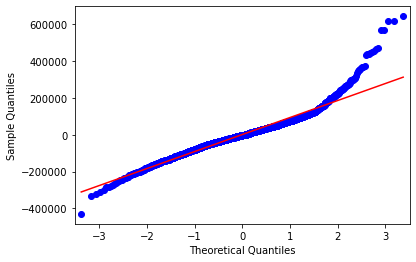

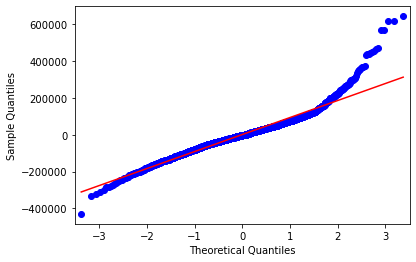

In [47]:
data = df_z_score_zip_dummies.copy()

y = data['price']
X = data.drop(['price', 'id', 'zipcode', 'sqft_above'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

len(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

r2_score(y_test, y_hat_test)

residuals = (y_test - y_hat_test)

statsmodels.graphics.gofplots.qqplot(residuals, line = "r")

In [49]:
np.sqrt(mse_test) / df.price.mean()

0.17686084283897036

## Model 5 - model 1 plus log transforms

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=objec

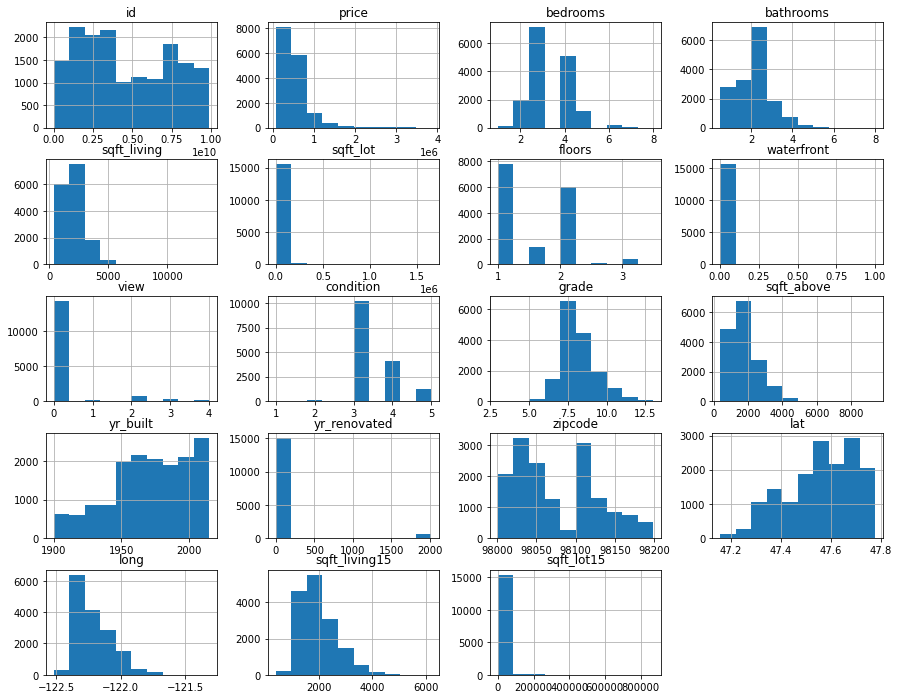

In [51]:
df.hist(figsize=(15,12))

<AxesSubplot:>

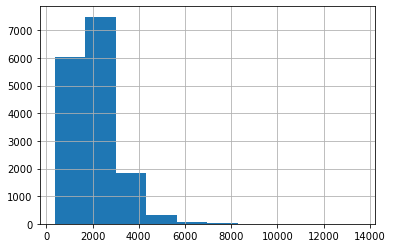

In [55]:
df.sqft_living.hist()

In [53]:
df['log_sqft_living'] = np.log(df['sqft_living'])

<AxesSubplot:>

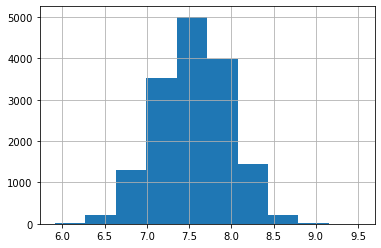

In [54]:
df.log_sqft_living.hist()

<AxesSubplot:xlabel='log_sqft_lot', ylabel='price'>

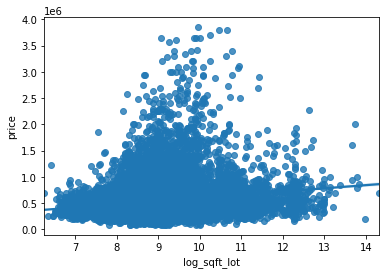

In [69]:
sns.regplot(x = "log_sqft_lot", y= "price", data = df)

In [56]:
df['log_sqft_living15'] = np.log(df['sqft_living15'])

In [57]:
df['log_bathrooms'] = np.log(df['bathrooms'])
df['log_sqft_lot'] = np.log(df['sqft_lot'])
df['log_sqft_lot15'] = np.log(df['sqft_lot15'])

In [65]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,log_sqft_living,log_sqft_living15,log_bathrooms,log_sqft_lot,log_sqft_lot15
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,98125,47.7210,-122.319,1690,7639,7.851661,7.432484,0.810930,8.887653,8.941022
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,98136,47.5208,-122.393,1360,5000,7.580700,7.215240,1.098612,8.517193,8.517193
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,98074,47.6168,-122.045,1800,7503,7.426549,7.495542,0.693147,8.997147,8.923058
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,...,98053,47.6561,-122.005,4760,101930,8.597851,8.468003,1.504077,11.532042,11.532042
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,...,98003,47.3097,-122.327,2238,6819,7.447168,7.713338,0.810930,8.827468,8.827468


In [60]:
outcome = 'price'
x_cols = df.drop(['price' , 'id', 'zipcode', 'sqft_above', 'sqft_lot15', 'sqft_lot', 'sqft_living',
                                     'bathrooms', 'sqft_living15'], axis = 1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

In [61]:
model_5 = ols(formula= f, data = df).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     2093.
Date:                Thu, 07 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:50:57   Log-Likelihood:            -2.1465e+05
No. Observations:               15741   AIC:                         4.293e+05
Df Residuals:                   15725   BIC:                         4.295e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.966e+07   1.92e+06    -15.456      0.000   -3.34e+07   -2.59e+07
bedrooms          -9587.3634   2454.271     -3.906      0.000   -1.44e+04   -4776.709
floors             2.302e+04   4006.180      5.746      0.000    1.52e+04    3.09e+04
waterfront         5.794e+05   2.08e+04     27.918      0.000    5.39e+05     6.2e+05
view               5.783e+04   2486.347     23.258      0.000     5.3e+04    6.27e+04
condition          3.239e+04   2766.686     11.706      0.000     2.7e+04    3.78e+04
grade              1.402e+05   2413.437     58.094      0.000    1.35e+05    1.45e+05
yr_built          -2607.8908     86.242    -30.239      0.000   -2776.936   -2438.846
yr_renovated         22.7509      4.363      5.214      0.000      14.198      31.303
lat                5.487e+05   1.23e+04     44.456      0.000    5.25e+05    5.73e+05
long              -4.943e+04   1.43e+04     -3.464      0.001   -7.74e+04   -2.15e+04
log_sqft_living    1.806e+05   8960.767     20.158      0.000    1.63e+05    1.98e+05
log_sqft_living15  8.795e+04   8348.899     10.534      0.000    7.16e+04    1.04e+05
log_bathrooms      3.979e+04   7547.477      5.271      0.000     2.5e+04    5.46e+04
log_sqft_lot       1.222e+04   4638.040      2.635      0.008    3130.191    2.13e+04
log_sqft_lot15    -1.916e+04   5071.938     -3.777      0.000   -2.91e+04   -9217.574
==============================================================================
Omnibus:                    10415.148   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           264746.813
Skew:                           2.800   Prob(JB):                         0.00
Kurtosis:                      22.295   Cond. No.                     2.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train MSE: 39251505638.970604
Test MSE: 47724115295.462585
RMSE Train: 198119.9274151154
RMSE Test: 218458.4978788021


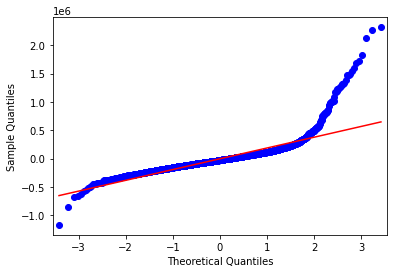

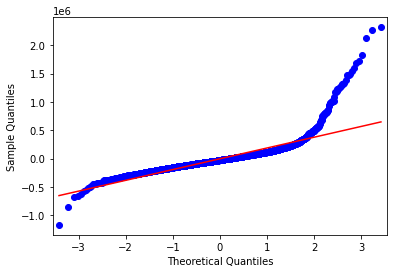

In [64]:
data = df.copy()

y = data['price']
X = data.drop(['price', 'id', 'zipcode', 'sqft_above', 'sqft_lot15', 'sqft_lot', 'sqft_living',
                                     'bathrooms', 'sqft_living15'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

len(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

r2_score(y_test, y_hat_test)

residuals = (y_test - y_hat_test)

statsmodels.graphics.gofplots.qqplot(residuals, line = "r")

#### plot from model 1

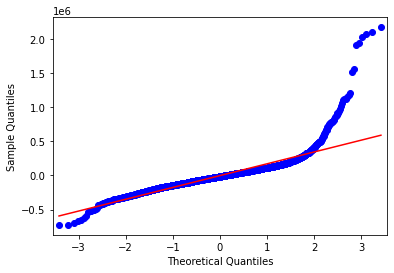

In [ ]:
np.exp()